<a href="https://colab.research.google.com/github/letmisyr/testing/blob/main/Capstone_testing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile

# Mount Drive
drive.mount('/content/drive') # Changed the mount path to the typical path

# Ekstrak file zip dari Drive
with zipfile.ZipFile('/content/drive/MyDrive/Dataset Chilli disease.zip', 'r') as zip_ref: #changed path to the default drive location.
    zip_ref.extractall('/content/Chili')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Direktori data
TRAIN_DIR = 'Chili/Capstone Dataset/train'
VALIDATION_DIR = 'Chili/Capstone Dataset/val'

In [ ]:
def train_val_datasets():
    """Create train and validation datasets

    Returns:
        (tf.data.Dataset, tf.data.Dataset): train and validation datasets
    """

    train_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=TRAIN_DIR,
        batch_size=32,
        image_size=(150,150),
		    label_mode='categorical',
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(150,150),
		    label_mode='categorical',
    )

    return train_dataset, validation_dataset

In [ ]:
# Create train and validation datasets
train_dataset, validation_dataset = train_val_datasets()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")

Found 435 files belonging to 11 classes.
Found 54 files belonging to 11 classes.
Images of train dataset have shape: (None, 150, 150, 3)
Labels of train dataset have shape: (None, 11)
Images of validation dataset have shape: (None, 150, 150, 3)
Labels of validation dataset have shape: (None, 11)


In [ ]:
# GRADED FUNCTION: create_model
def create_model():
    """Create the classifier model

    Returns:
        tf.keras.model.Sequential: CNN for multi-class classification
    """


    # Define the model
    # Use no more than 2 Conv2D and 2 MaxPooling2D
    model = tf.keras.models.Sequential([
        # Define an input layer
        tf.keras.Input(shape=(150,150,3)), # Set correct input size
        # Rescale images
        tf.keras.layers.Rescaling(scale=1./255),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(11,activation='softmax')
        ])

    model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])


    return model

In [ ]:
# Create your model
model = create_model()
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 150, 150, 3)
Output shape: (None, 11)


In [ ]:
# Train your model
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.1045 - loss: 4.2444 - val_accuracy: 0.1852 - val_loss: 2.4272
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.1900 - loss: 2.2955 - val_accuracy: 0.3148 - val_loss: 1.9388
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.2932 - loss: 2.0364 - val_accuracy: 0.2222 - val_loss: 2.0897
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.4690 - loss: 1.7196 - val_accuracy: 0.2963 - val_loss: 2.5046
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4691 - loss: 1.6839 - val_accuracy: 0.5370 - val_loss: 1.3960
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6100 - loss: 1.1552 - val_accuracy: 0.3704 - val_loss: 1.7658
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6843 - loss: 1.0083 - val_accuracy: 0.5185 - val_loss: 1.4906
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6961 - loss: 0.8713 - val_accuracy: 0.4444 - val_loss:

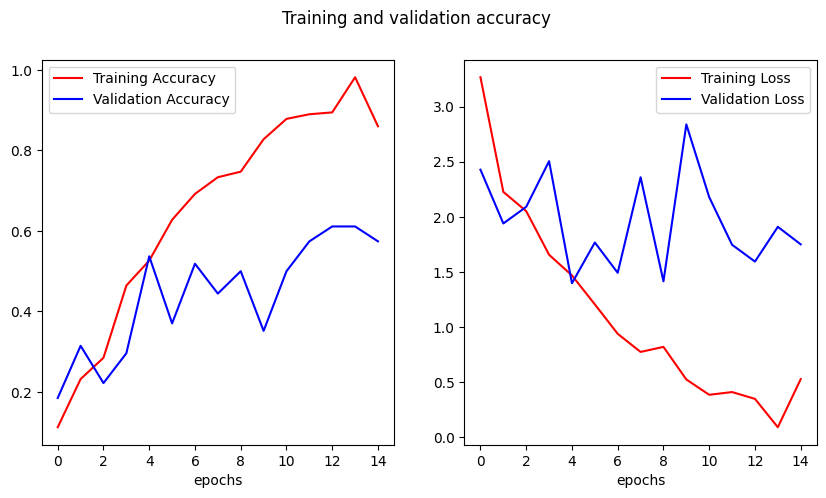

In [ ]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [ ]:
import os
# Directory with training Disease pictures
train_Sehat_dir = os.path.join(TRAIN_DIR, 'Sehat')
train_Bercak_Daun_dir = os.path.join(TRAIN_DIR, 'Bercak Daun')
train_Layu_Fusarium_Layu_Bakteri_dir = os.path.join(TRAIN_DIR, 'Layu Fusarium & Layu Bakteri')
train_Virus_Kuning_dir = os.path.join(TRAIN_DIR, 'Virus Kuning')
train_Ulat_Grayak_dir = os.path.join(TRAIN_DIR, 'Ulat Grayak')
train_Busuk_Buah_Antraknosa_dir = os.path.join(TRAIN_DIR, 'Busuk Buah Antraknosa')
train_Kutu_Daun_Persik_dir = os.path.join(TRAIN_DIR, 'Kutu Daun Persik')
train_Kutu_Daun_dir = os.path.join(TRAIN_DIR, 'Kutu Daun')
train_Kutu_Kebul_dir = os.path.join(TRAIN_DIR, 'Kutu Kebul')
train_Lalat_Buah_dir = os.path.join(TRAIN_DIR, 'Lalat Buah')
train_Thrips_Tungau_dir = os.path.join(TRAIN_DIR, 'Thrips & Tungau')

validation_Sehat_dir = os.path.join(VALIDATION_DIR, 'Sehat')
validation_Bercak_Daun_dir = os.path.join(VALIDATION_DIR, 'Bercak Daun')
validation_Layu_Fusarium_Layu_Bakteri_dir = os.path.join(VALIDATION_DIR, 'Layu Fusarium & Layu Bakteri')
validation_Virus_Kuning_dir = os.path.join(VALIDATION_DIR, 'Virus Kuning')
validation_Ulat_Grayak_dir = os.path.join(VALIDATION_DIR, 'Ulat Grayak')
validation_Busuk_Buah_Antraknosa_dir = os.path.join(VALIDATION_DIR, 'Busuk Buah Antraknosa')
validation_Kutu_Daun_Persik_dir = os.path.join(VALIDATION_DIR, 'Kutu Daun Persik')
validation_Kutu_Daun_dir = os.path.join(VALIDATION_DIR, 'Kutu Daun')
validation_Kutu_Kebul_dir = os.path.join(VALIDATION_DIR, 'Kutu Kebul')
validation_Lalat_Buah_dir = os.path.join(VALIDATION_DIR, 'Lalat Buah')
validation_Thrips_Tungau_dir = os.path.join(VALIDATION_DIR, 'Thrips & Tungau')

train_Sehat_fnames = os.listdir(train_Sehat_dir)
train_Bercak_Daun_fnames = os.listdir(train_Bercak_Daun_dir)
train_Layu_Fusarium_Layu_Bakteri_fnames = os.listdir(train_Layu_Fusarium_Layu_Bakteri_dir)
train_Virus_Kuning_fnames = os.listdir(train_Virus_Kuning_dir)
train_Ulat_Grayak_fnames = os.listdir(train_Ulat_Grayak_dir)
train_Busuk_Buah_Antraknosa_fnames = os.listdir(train_Busuk_Buah_Antraknosa_dir)
train_Kutu_Daun_Persik_fnames = os.listdir(train_Kutu_Daun_Persik_dir)
train_Kutu_Daun_fnames = os.listdir(train_Kutu_Daun_dir)
train_Kutu_Kebul_fnames = os.listdir(train_Kutu_Kebul_dir)
train_Lalat_Buah_fnames = os.listdir(train_Lalat_Buah_dir)
train_Thrips_Tungau_fnames = os.listdir(train_Thrips_Tungau_dir)

print(f"5 files in Sehat subdir: {train_Sehat_fnames[:5]}")
print(f"5 files in Bercak Daun subdir: {train_Bercak_Daun_fnames[:5]}")
print(f"5 files in Layu Fusarium & Layu Bakteri subdir: {(train_Layu_Fusarium_Layu_Bakteri_fnames)[:5]}")
print(f"5 files in Virus Kuning subdir: {train_Virus_Kuning_fnames[:5]}")
print(f"5 files in Ulat Grayak subdir: {train_Ulat_Grayak_fnames[:5]}")
print(f"5 files in Busuk Buah Antraknosa subdir: {train_Busuk_Buah_Antraknosa_fnames[:5]}")
print(f"5 files in Kutu Daun Persik subdir: {train_Kutu_Daun_Persik_fnames[:5]}")
print(f"5 files in Kutu Daun subdir: {train_Kutu_Daun_fnames[:5]}")
print(f"5 files in Kutu Kebul subdir: {train_Kutu_Kebul_fnames[:5]}")
print(f"5 files in Lalat Buah subdir: {train_Lalat_Buah_fnames[:5]}")
print(f"5 files in Thrips & Tungau subdir: {train_Thrips_Tungau_fnames[:5]}")

5 files in Sehat subdir: ['Cabai sehat035.jpg', 'Cabai sehat028.jpg', 'Cabai sehat029.jpg', 'Cabai sehat031.jpg', 'Cabai sehat019.jpg']
5 files in Bercak Daun subdir: ['leaf spot82.jpg', 'leaf spot54.jpg', 'leaf spot17.jpg', 'leaf spot42.jpg', 'leaf spot79.jpg']
5 files in Layu Fusarium & Layu Bakteri subdir: ['Image_16.png', 'Image_60.jpg', 'Image_14.jpg', 'Image_73.jpg', 'Image_18.jpg']
5 files in Virus Kuning subdir: ['Cabai virus kuning27.jpg', 'yellowish10 (1).jpg', 'Cabai virus kuning33.jpg', 'yellowish10.jpg', 'yellowish19.jpg']
5 files in Ulat Grayak subdir: ['Ulat Grayak(11).jpg', 'Ulat Grayak(24).jpg', 'Ulat Grayak(38).jpg', 'Ulat Grayak(31).jpg', 'Ulat Grayak(41).jpg']
5 files in Busuk Buah Antraknosa subdir: ['Buah Busuk(29).jpg', 'Buah Busuk(36).jpg', 'Buah Busuk(46).jpg', 'Buah Busuk(37).jpg', 'Buah Busuk(34).jpg']
5 files in Kutu Daun Persik subdir: ['Kutu Daun Persik(8).jpg', 'Kutu Daun Persik(40).jpg', 'Kutu Daun Persik(31).jpg', 'Kutu Daun Persik(9).jpg', 'Kutu Daun P

In [ ]:
print(f'total training Sehat images: {len(os.listdir(train_Sehat_dir))}')
print(f'total training Bercak Daun images: {len(os.listdir(train_Bercak_Daun_dir))}')
print(f'total training Layu Fusarium & Layu Bakteri images: {len(os.listdir(train_Layu_Fusarium_Layu_Bakteri_dir))}')
print(f'total training Virus Kuning images: {len(os.listdir(train_Virus_Kuning_dir))}')
print(f'total training Ulat Grayak images: {len(os.listdir(train_Ulat_Grayak_dir))}')
print(f'total training Busuk Buah Antraknosa images: {len(os.listdir(train_Busuk_Buah_Antraknosa_dir))}')
print(f'total training Kutu Daun Persik images: {len(os.listdir(train_Kutu_Daun_Persik_dir))}')
print(f'total training Kutu Daun images: {len(os.listdir(train_Kutu_Daun_dir))}')
print(f'total training Kutu Kebul images: {len(os.listdir(train_Kutu_Kebul_dir))}')
print(f'total training Lalat Buah images: {len(os.listdir(train_Lalat_Buah_dir))}')
print(f'total training Thrips & Tungau images: {len(os.listdir(train_Thrips_Tungau_dir))}')

print(f'total validation Sehat images: {len(os.listdir(validation_Sehat_dir))}')
print(f'total validation Bercak Daun images: {len(os.listdir(validation_Bercak_Daun_dir))}')
print(f'total validation Layu Fusarium & Layu Bakteri images: {len(os.listdir(validation_Layu_Fusarium_Layu_Bakteri_dir))}')
print(f'total validation Virus Kuning images: {len(os.listdir(validation_Virus_Kuning_dir))}')
print(f'total validation Ulat Grayak images: {len(os.listdir(validation_Ulat_Grayak_dir))}')
print(f'total validation Busuk Buah Antraknosa images: {len(os.listdir(validation_Busuk_Buah_Antraknosa_dir))}')
print(f'total validation Kutu Daun Persik images: {len(os.listdir(validation_Kutu_Daun_Persik_dir))}')
print(f'total validation Kutu Daun images: {len(os.listdir(validation_Kutu_Daun_dir))}')
print(f'total validation Kutu Kebul images: {len(os.listdir(validation_Kutu_Kebul_dir))}')
print(f'total validation Lalat Buah images: {len(os.listdir(validation_Lalat_Buah_dir))}')
print(f'total validation Thrips & Tungau images: {len(os.listdir(validation_Thrips_Tungau_dir))}')


total training Sehat images: 40
total training Bercak Daun images: 40
total training Layu Fusarium & Layu Bakteri images: 40
total training Virus Kuning images: 40
total training Ulat Grayak images: 47
total training Busuk Buah Antraknosa images: 40
total training Kutu Daun Persik images: 40
total training Kutu Daun images: 40
total training Kutu Kebul images: 43
total training Lalat Buah images: 25
total training Thrips & Tungau images: 40
total validation Sehat images: 5
total validation Bercak Daun images: 5
total validation Layu Fusarium & Layu Bakteri images: 5
total validation Virus Kuning images: 5
total validation Ulat Grayak images: 5
total validation Busuk Buah Antraknosa images: 5
total validation Kutu Daun Persik images: 5
total validation Kutu Daun images: 5
total validation Kutu Kebul images: 5
total validation Lalat Buah images: 5
total validation Thrips & Tungau images: 5


ValueError: num must be an integer with 1 <= num <= 25, not 26

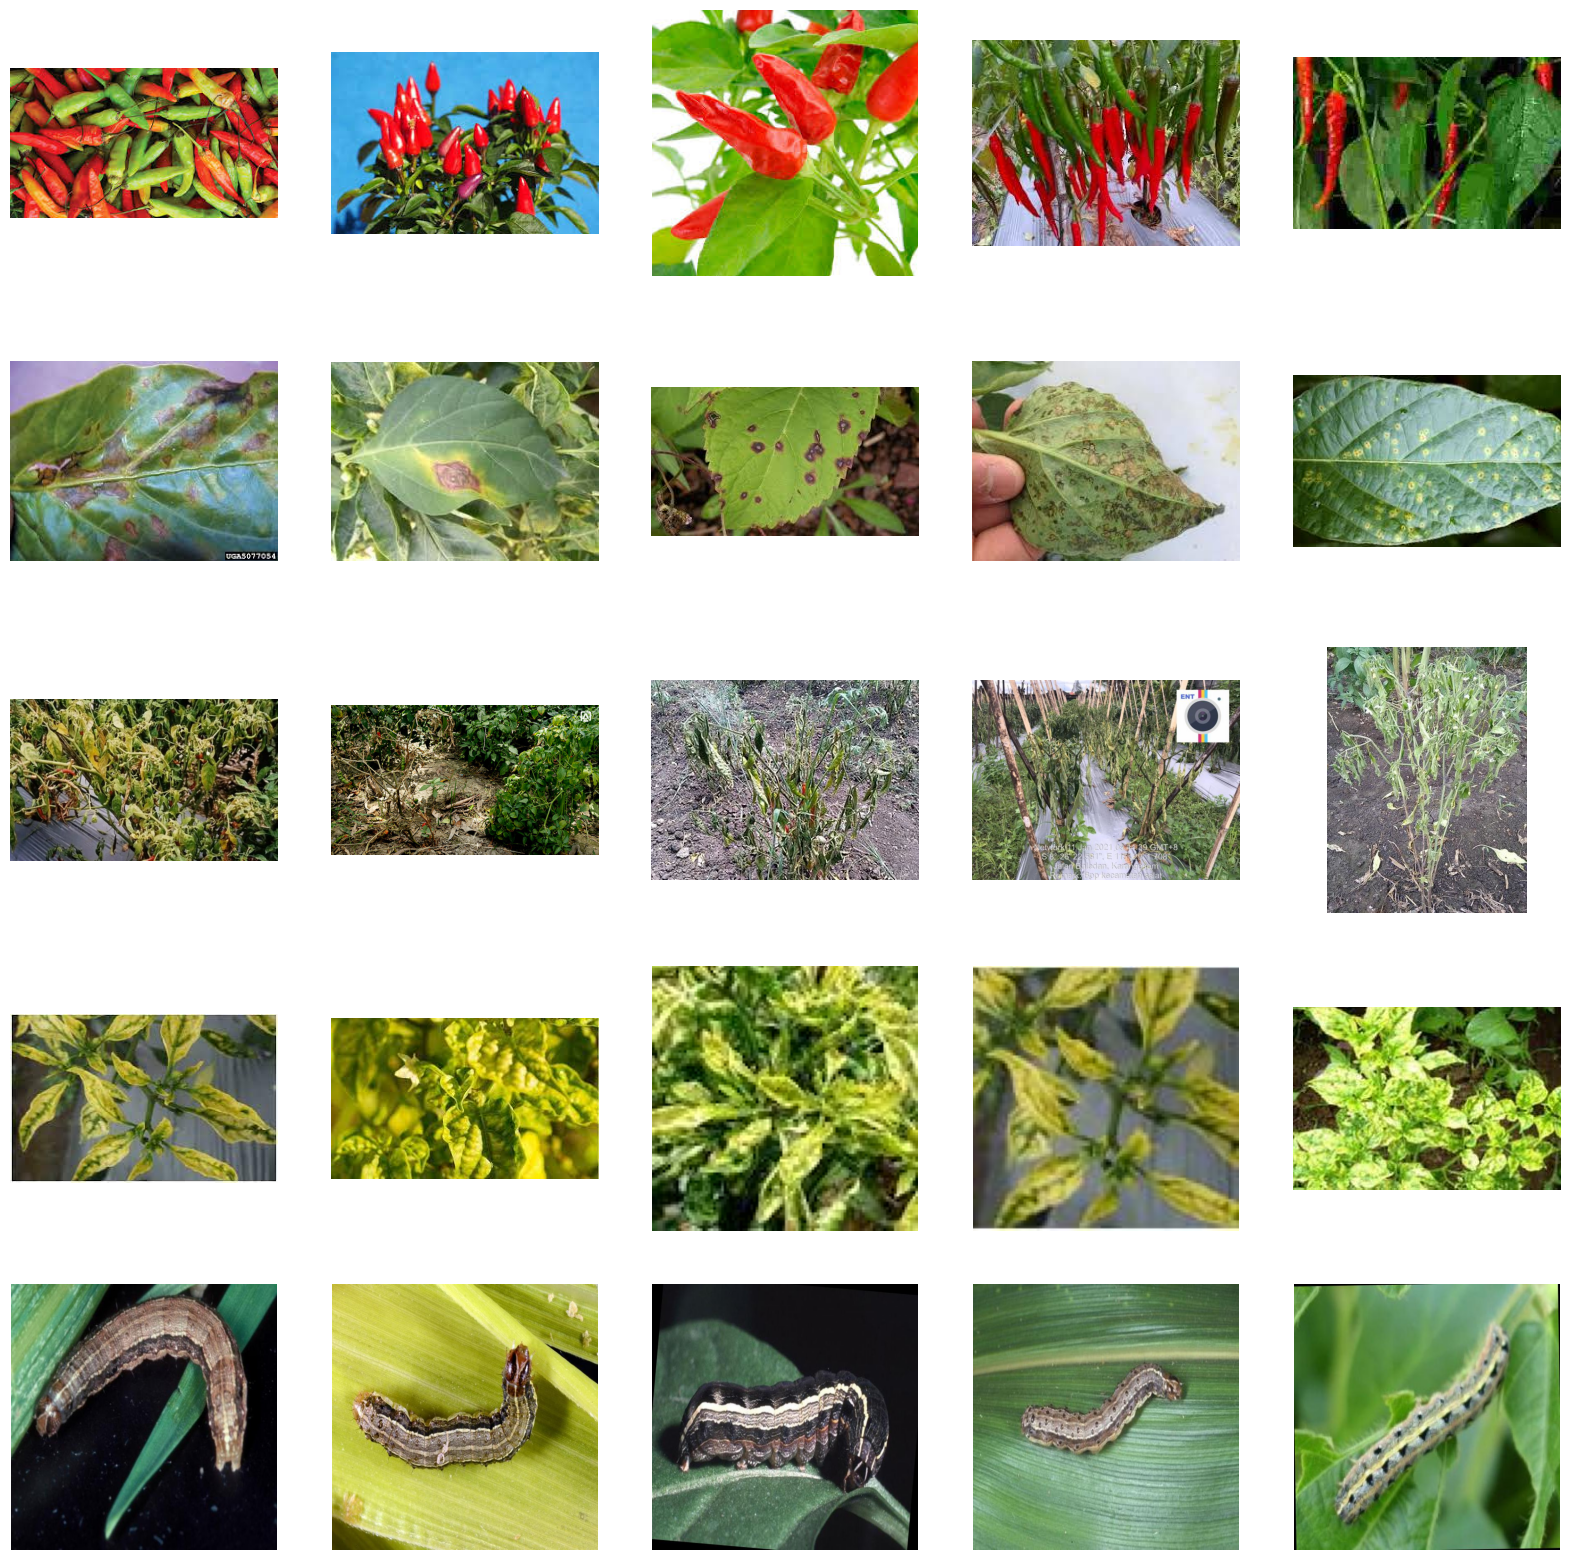

In [ ]:
import random
import matplotlib.image as mpimg
import math

# Parameters for your graph; you will output images in a 4x4 configuration
nrows = 5
ncols = 5

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

next_Sehat_pix = [os.path.join(train_Sehat_dir, fname)
                for fname in random.sample(train_Sehat_fnames, k=5)]

next_Bercak_Daun_pix = [os.path.join(train_Bercak_Daun_dir, fname)
                for fname in random.sample(train_Bercak_Daun_fnames, k=5)]

next_Layu_Fusarium_Layu_Bakteri_pix = [os.path.join(train_Layu_Fusarium_Layu_Bakteri_dir, fname)
                for fname in random.sample(train_Layu_Fusarium_Layu_Bakteri_fnames, k=5)]

next_Virus_Kuning_pix = [os.path.join(train_Virus_Kuning_dir, fname)
                for fname in random.sample(train_Virus_Kuning_fnames, k=5)]

next_Ulat_Grayak_pix = [os.path.join(train_Ulat_Grayak_dir, fname)
                for fname in random.sample(train_Ulat_Grayak_fnames, k=5)]

next_Busuk_Buah_Antraknosa_pix = [os.path.join(train_Busuk_Buah_Antraknosa_dir, fname)
                for fname in random.sample(train_Busuk_Buah_Antraknosa_fnames, k=5)]

next_Kutu_Daun_Persik_pix = [os.path.join(train_Kutu_Daun_Persik_dir, fname)
                for fname in random.sample(train_Kutu_Daun_Persik_fnames, k=5)]

next_Kutu_Daun_pix = [os.path.join(train_Kutu_Daun_dir, fname)
                for fname in random.sample(train_Kutu_Daun_fnames, k=5)]

next_Kutu_Kebul_pix = [os.path.join(train_Kutu_Kebul_dir, fname)
                for fname in random.sample(train_Kutu_Kebul_fnames, k=5)]

next_Lalat_Buah_pix = [os.path.join(train_Lalat_Buah_dir, fname)
                for fname in random.sample(train_Lalat_Buah_fnames, k=5)]

next_Thrips_Tungau_pix = [os.path.join(train_Thrips_Tungau_dir, fname)
                for fname in random.sample(train_Thrips_Tungau_fnames, k=5)]


# Hitung jumlah gambar
for i, img_path in enumerate(next_Sehat_pix + next_Bercak_Daun_pix + next_Layu_Fusarium_Layu_Bakteri_pix +
                   next_Virus_Kuning_pix + next_Ulat_Grayak_pix + next_Busuk_Buah_Antraknosa_pix +
                   next_Kutu_Daun_Persik_pix + next_Kutu_Daun_pix + next_Kutu_Kebul_pix +
                   next_Lalat_Buah_pix + next_Thrips_Tungau_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
model.save('testChiliMNV2.h5')
print('Saved trained model as %s ' % 'testChiliMNV2.h5')

Saved trained model as testChiliMNV2.h5 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


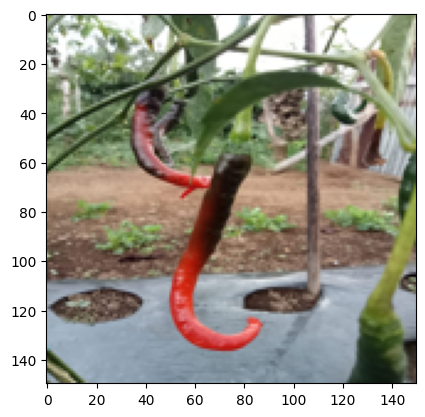

Predicted Label: Layu Fusarium & Layu Bakteri
Confidence Score: 0.92730224


In [ ]:
import numpy as np
#from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model from Google Drive
model_path = '/content/testChiliMNV2.h5'
model = tf.keras.models.load_model(model_path)

# Define the class labels
class_labels = ["Sehat", "Bercak Daun", "Busuk Buah Antraknosa", "Virus Kuning",  "Ulat Grayak", "Kutu Daun", "Kutu kebul", "Kutu Daun Persik", "Lalat Buah", "Layu Fusarium & Layu Bakteri", "Thrips & Tungau",]

# Function to preprocess and predict on an uploaded image
def preprocess_and_predict(image):
    # Preprocess the image
    img = image.resize((150, 150))
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])

    # Make the prediction
    prediction = model.predict(images)[0]
    predicted_class = np.argmax(prediction)
    class_label = class_labels[predicted_class]
    confidence = prediction[predicted_class]

    # Display the image and prediction result
    plt.imshow(img)
    plt.show()

    print("Predicted Label:", class_label)
    print("Confidence Score:", confidence)

# Replace this with the path to your image file
image_path = '/content/Chili/Capstone Dataset/test/Lalat Buah/original (1).jpg'

# Load the image
img = Image.open(image_path).convert("RGB")

# Call the preprocessing and prediction function
preprocess_and_predict(img)

In [ ]:
predictions = model.predict(validation_dataset)
print(predictions[0])

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step
[9.7324988e-03 1.4307526e-04 1.7522690e-06 7.0017646e-04 9.7985202e-01
 2.5659001e-05 2.6452332e-03 7.3149320e-05 6.2598372e-03 5.5196864e-04
 1.4522396e-05]
